## Crop Diseases Prediction Using (MobileNetV2)

In [7]:
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

In [8]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = "C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train"

In [9]:
# Import the InceptionV3 model and here we will be using imagenet weights

mobilenet = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [11]:
# We don't need to train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [12]:
# Folders in the Training Set
folders = glob('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\*')
folders

['C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Early_blight',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___healthy',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Late_blight',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Leaf_Mold',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Target_Spot',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Tomato_mosaic_virus',
 'C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [13]:
# Model layers -> can add more if required
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [15]:
# Create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [16]:
# Defining the cost and model optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Training Generator
training_set = train_datagen.flow_from_directory('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14532 images belonging to 10 classes.


In [19]:
# Testing Generator
test_set = test_datagen.flow_from_directory('C:\\Users\\rashm\\anaconda3\\CropDisease\\dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3628 images belonging to 10 classes.


In [20]:
# fit the model, it will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\rashm\AppData\Local\Temp\ipykernel_9540\2655456400.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
455/455 [==============================] - 156s 312ms/step - loss: 2.4833 - accuracy: 0.7956 - val_loss: 2.1260 - val_accuracy: 0.8341
Epoch 2/50
455/455 [==============================] - 129s 284ms/step - loss: 1.4918 - accuracy: 0.8904 - val_loss: 1.8055 - val_accuracy: 0.8829
Epoch 3/50
455/455 [==============================] - 128s 281ms/step - loss: 1.4001 - accuracy: 0.9097 - val_loss: 2.6734 - val_accuracy: 0.8580
Epoch 4/50
455/455 [==============================] - 129s 284ms/step - loss: 1.4623 - accuracy: 0.9138 - val_loss: 2.4122 - val_accuracy: 0.8807
Epoch 5/50
455/455 [==============================] - 129s 283ms/step - loss: 1.2226 - accuracy: 0.9324 - val_loss: 2.1557 - val_accuracy: 0.8939
Epoch 6/50
455/455 [==============================] - 131s 289ms/step - loss: 1.0609 - accuracy: 0.9397 - val_loss: 2.2896 - val_accuracy: 0.9008
Epoch 7/50
455/455 [==============================] - 129s 283ms/step - loss: 1.0581 - accuracy: 0.9412 - val_loss: 1.8668 -

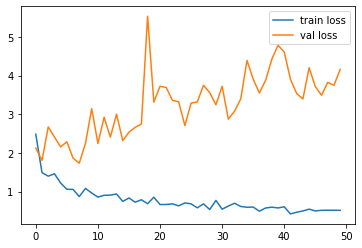

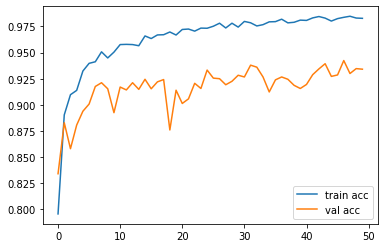

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model
model.save('C:\\Users\\rashm\\anaconda3\\CropDisease\\model_mobilenetv2.h5')